In [2]:
#import necessary libraries
import pandas as pd
import numpy as np

In [3]:
#load the dataset

df=pd.read_csv("C:/Users/manag/Sudan Chapter/health_sites_sdn.csv")
df.head()

,Name,X,Y,addr_city,addr_street,amenity,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid,Unnamed: 15
0,0,32.536015,15.632537,0,0,pharmacy,59859075,2018-06-14 20:48:56,allasafieldin,1,12,yes,5691668660,node,62a1f69b5e464b3a831724e7e633b9f7,NaN
1,0,0.000000,0.000000,0,0,hospital,82920351,2020-04-01 11:29:56,AARod,1,9,0,786505555,way,6bed7ba76fdc43f2a959908df295b6c8,NaN
2,0,32.533961,15.528663,0,0,pharmacy,30685807,2015-05-01 09:28:35,AhmedSDN,1,6,0,3490668393,node,516a03ec3daf43e68f01ca8c8564d169,NaN
3,Wad Musa Pharmacy,32.441141,15.683439,0,0,pharmacy,89779217,2020-08-22 12:03:41,ImadJ,1,15,yes,7834704444,node,77c5b490089945198e0cfa5b45bd5c6b,NaN
4,0,0.000000,0.000000,0,0,hospital,61428897,2018-08-07 09:45:25,ali-hasboo,1,12,0,614753021,way,5888223145234835bd0211b5475c0469,NaN


In [4]:
#identify the number of rows and columns
rows = len(df.axes[0])
print("\nNumber of rows:",rows)

columns = len(df.axes[1])
print("\nNumber of columns:",columns,"\n")


Number of rows: 1180

Number of columns: 16 



In [5]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1180 non-null   object 
 1   X                    1180 non-null   float64
 2   Y                    1180 non-null   float64
 3   addr_city            1180 non-null   object 
 4   addr_street          1180 non-null   object 
 5   amenity              1180 non-null   object 
 6   changeset_id         1180 non-null   int64  
 7   changeset_timestamp  1180 non-null   object 
 8   changeset_user       1180 non-null   object 
 9   changeset_version    1180 non-null   int64  
 10  completeness         1180 non-null   int64  
 11  dispensing           1180 non-null   object 
 12  osm_id               1180 non-null   int64  
 13  osm_type             1180 non-null   object 
 14  uuid                 1180 non-null   object 
 15  Unnamed: 15          0 non-null      f

In [6]:
#Basic statiscal measures
df.describe()

,X,Y,changeset_id,changeset_version,completeness,osm_id,Unnamed: 15
count,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1.180000e+03,0.0
mean,31.775855,15.186397,9.132590e+06,0.180508,1.436441,6.434055e+09,NaN
std,4.785858,2.337769,2.545192e+07,0.562129,4.111490,1.582652e+09,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.922450e+07,NaN
25%,32.485813,15.534281,0.000000e+00,0.000000,0.000000,6.055029e+09,NaN
50%,32.531007,15.597713,0.000000e+00,0.000000,0.000000,6.953330e+09,NaN
75%,32.570649,15.641503,0.000000e+00,0.000000,0.000000,7.154078e+09,NaN
max,37.217447,20.748716,1.110008e+08,6.000000,24.000000,1.200026e+10,NaN


In [7]:
#handle unnecessary columns
df = df.drop(["Unnamed: 15", "addr_city",  "addr_street","changeset_id", "changeset_timestamp", "changeset_user", "changeset_version"], axis =1)

In [8]:
#handle data in 'Name' that does not have an entry
df = df[df['Name'] != '0']

In [12]:
#evaluate facility types
df['amenity'].value_counts()

amenity
pharmacy    893
hospital     86
clinic       86
dentist      21
doctors      15
0             8
Name: count, dtype: int64

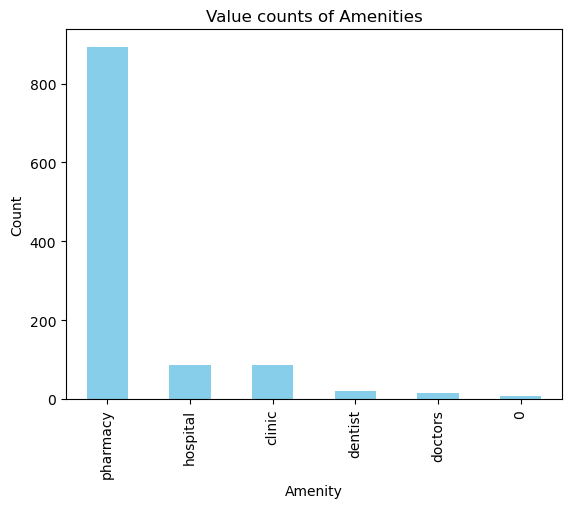

In [13]:
#analyzing distribution of target variable
import matplotlib.pyplot as plt

df["amenity"].value_counts().plot(kind='bar', color='skyblue')

plt.xlabel('Amenity')
plt.ylabel('Count')
plt.title('Value counts of Amenities')
plt.show()

There is a rarity in common range with one extreme high and many low counts, this suggests a class imbalance.

In [14]:
#handling amenity 0
df = df[df['amenity'] != '0']

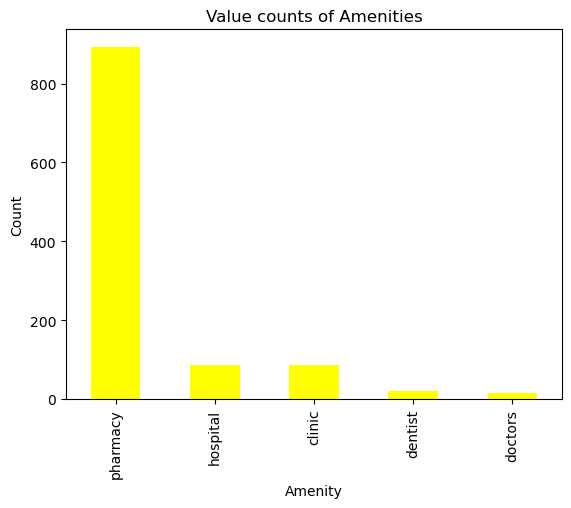

In [16]:
#analyzing distribution of target variable with updates
df["amenity"].value_counts().plot(kind='bar', color='yellow')

plt.xlabel('Amenity')
plt.ylabel('Count')
plt.title('Value counts of Amenities')
plt.show()